In [554]:
import pandas as pd
import matplotlib
import numpy as np
import statsmodels.formula.api as smf

In [3]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
#top 100 nft collections from the past 30 days
top100cols = pd.read_csv('response_1650837751168.csv', encoding="ISO-8859-1")

In [577]:
top100cols.head()

,rank,iconUrl,contractName,baseCurrency,isSalesOnly,value,valueUSD,platform,buyers,sellers,owners,transactions,changeInValueUSD,previousValue,previousValueUSD,new
0,1,https://cryptoslam-token-images.s3.amazonaws.c...,Moonbirds,ETH,False,144223.646871,4.368491e+08,0,11463,5852,0,15350,NaN,0.000000e+00,0.000000e+00,True
1,2,https://d1nht67oz99wd1.cloudfront.net/resized/...,Mutant Ape Yacht Club,ETH,False,378753.322132,2.012193e+08,0,1604,1682,0,2378,34.372324,2.497016e+05,1.497476e+08,False
2,3,https://d1nht67oz99wd1.cloudfront.net/resized/...,Bored Ape Yacht Club,ETH,False,976209.188961,1.780618e+08,0,403,469,0,636,-24.376675,1.224044e+06,2.354589e+08,False
3,4,https://d1nht67oz99wd1.cloudfront.net/az.png,Azuki,ETH,False,140752.701392,1.679883e+08,0,1256,1559,0,2186,107.720492,2.864500e+04,8.087229e+07,False
4,5,https://d1nht67oz99wd1.cloudfront.net/clonex.jpeg,CloneX,ETH,False,783302.745107,1.090996e+08,0,1185,1233,0,1766,72.729914,1.465288e+05,6.316196e+07,False


In [228]:
top100cols.columns

Index(['rank', 'iconUrl', 'contractName', 'baseCurrency', 'isSalesOnly',
       'value', 'valueUSD', 'platform', 'buyers', 'sellers', 'owners',
       'transactions', 'changeInValueUSD', 'previousValue', 'previousValueUSD',
       'new'],
      dtype='object')

In [29]:
for i in range(100):
    print(top100cols['contractName'][i])

Moonbirds
Mutant Ape Yacht Club
Bored Ape Yacht Club
Azuki
CloneX
Beanz
World Of Women Galaxy
MurakamiFlowers Seed
Impostors Genesis
RTFKT MNLTH
CryptoPunks
Arcade Land
Kiwami
Doodles
Crabada
Bored Ape Kennel Club
MOAR by Joan Cornella
Akuma
CyberBrokers
Shinsekai
NBA Top Shot
EveraiDuo
Cool Cats
Sorare
World Of Women
Akutar Mint Pass
adidas Originals
VaynerSports Pass
MURI
DeGods
Meebits
PROOF Collective
Axie Infinity
VeeFriends Series 2
ZombieClub Token
mfer
Cool Pets
Los Muertos
The Art of Seasons
ShinseiGalverse
Invisible Friends
Bored Ape Chemistry Club
Quirkies
NFT Worlds
3Landers
fRiENDSiES
BAPETAVERSE
Pudgy Penguins
VeeFriends
The Association NFT
Art Blocks
Solana Monkey Business
ALIENFRENS
Gutter Juice
Max Pain and Frens
TombStoned HighSociety
CrypToadz
Cets on Crek
Karafuru
Nanopass
MNLTHRVLD
illogics
Degenerate Ape Academy
Haki
frank
Bobu the Bean Farmer
KREEPY CLUB
Acrocalypse
WebbLand
Rtfkt Nike x Monolith
MNLTHSKIN
Metroverse City Block
NFL All Day
Goopdoods
DeadFellaz
Bl

In [30]:
top100cols[top100cols['previousValue']==0]

,rank,iconUrl,contractName,baseCurrency,isSalesOnly,value,valueUSD,platform,buyers,sellers,owners,transactions,changeInValueUSD,previousValue,previousValueUSD
0,1,https://cryptoslam-token-images.s3.amazonaws.c...,Moonbirds,ETH,False,1.442236e+05,4.368491e+08,0,11463,5852,0,15350,NaN,0.0,0.0
5,6,https://cryptoslam-token-images.s3.amazonaws.c...,Beanz,ETH,False,4.422056e+04,9.637448e+07,0,3340,3180,0,6317,NaN,0.0,0.0
6,7,https://d1nht67oz99wd1.cloudfront.net/resized/...,World Of Women Galaxy,ETH,False,2.822800e+04,9.052281e+07,0,10561,5718,0,17349,NaN,0.0,0.0
7,8,https://cryptoslam-token-images.s3.amazonaws.c...,MurakamiFlowers Seed,ETH,True,2.869097e+04,8.801303e+07,0,3161,2674,1,4627,NaN,0.0,0.0
8,9,https://cryptoslam-token-images.s3.amazonaws.c...,Impostors Genesis,ETH,False,2.377924e+06,7.186495e+07,0,9060,4601,0,14082,NaN,0.0,0.0
11,12,https://cryptoslam-token-images.s3.amazonaws.c...,Arcade Land,ETH,False,1.724470e+04,5.662267e+07,0,8428,7259,0,16842,NaN,0.0,0.0
16,17,https://cryptoslam-token-images.s3.amazonaws.c...,MOAR by Joan Cornella,ETH,False,1.154854e+04,3.658337e+07,0,4768,3582,0,7681,NaN,0.0,0.0
17,18,https://cryptoslam-token-images.s3.amazonaws.c...,Akuma,ETH,True,9.880556e+03,3.292430e+07,0,5257,5805,0,12749,NaN,0.0,0.0
19,20,https://cryptoslam-token-images.s3.amazonaws.c...,Shinsekai,ETH,False,9.092606e+03,2.859907e+07,0,8524,8819,0,18909,NaN,0.0,0.0
21,22,https://cryptoslam-token-images.s3.amazonaws.c...,EveraiDuo,ETH,True,8.442757e+03,2.778673e+07,0,9177,7355,0,18970,NaN,0.0,0.0


In [31]:
def new(row):
    if top100cols['previousValue']==0:
        val = True
    else:
        val = False

In [32]:
top100cols['new'] = np.where(top100cols['previousValue'] == 0, True, False)

In [33]:
top100cols

,rank,iconUrl,contractName,baseCurrency,isSalesOnly,value,valueUSD,platform,buyers,sellers,owners,transactions,changeInValueUSD,previousValue,previousValueUSD,new
0,1,https://cryptoslam-token-images.s3.amazonaws.c...,Moonbirds,ETH,False,1.442236e+05,4.368491e+08,0,11463,5852,0,15350,NaN,0.000000e+00,0.000000e+00,True
1,2,https://d1nht67oz99wd1.cloudfront.net/resized/...,Mutant Ape Yacht Club,ETH,False,3.787533e+05,2.012193e+08,0,1604,1682,0,2378,34.372324,2.497016e+05,1.497476e+08,False
2,3,https://d1nht67oz99wd1.cloudfront.net/resized/...,Bored Ape Yacht Club,ETH,False,9.762092e+05,1.780618e+08,0,403,469,0,636,-24.376675,1.224044e+06,2.354589e+08,False
3,4,https://d1nht67oz99wd1.cloudfront.net/az.png,Azuki,ETH,False,1.407527e+05,1.679883e+08,0,1256,1559,0,2186,107.720492,2.864500e+04,8.087229e+07,False
4,5,https://d1nht67oz99wd1.cloudfront.net/clonex.jpeg,CloneX,ETH,False,7.833027e+05,1.090996e+08,0,1185,1233,0,1766,72.729914,1.465288e+05,6.316196e+07,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,https://cryptoslam-token-images.s3.amazonaws.c...,Space Boo,ETH,False,1.614417e+03,4.934264e+06,0,6541,5430,0,14252,NaN,0.000000e+00,0.000000e+00,True
96,97,https://d1nht67oz99wd1.cloudfront.net/bossbeau...,Boss Beauties,ETH,False,1.510726e+03,4.857013e+06,0,728,767,0,1133,5.763541,1.656676e+03,4.592332e+06,False
97,98,https://cryptoslam-token-images.s3.amazonaws.c...,Candy Digital NFT,NaN,True,4.711974e+06,4.711974e+06,18,10876,3450,0,103165,158.037491,1.826081e+06,1.826081e+06,False
98,99,https://cryptoslam-token-images.s3.amazonaws.c...,MadMeerkatBurrow,CRO,True,1.104151e+07,4.711450e+06,21,527,548,0,992,66.039321,7.711671e+06,2.837551e+06,False


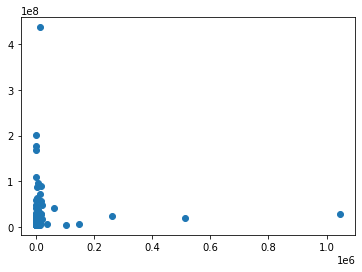

In [537]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [578]:
model = ols('valueUSD~transactions*buyers*sellers*owners*isSalesOnly*previousValueUSD', data=top100cols).fit()
anova_table = sm.stats.anova_lm(model)
anova_table[anova_table['PR(>F)'] < 0.05]

,df,sum_sq,mean_sq,F,PR(>F)
sellers,1.0,3.966537e+16,3.966537e+16,11.902384,0.000848
transactions:buyers:owners,1.0,2.403730e+16,2.403730e+16,7.212871,0.008587
previousValueUSD,1.0,6.562622e+16,6.562622e+16,19.692452,0.000025


In [575]:
model = ols('valueUSD~platform*baseCurrency', data=top100cols).fit()
anova_table = sm.stats.anova_lm(model)

In [576]:
anova_table[anova_table['PR(>F)'] < 0.05]

,df,sum_sq,mean_sq,F,PR(>F)
baseCurrency,6.0,1.477164e+17,2.461941e+16,7.908708,7.178234e-07


<AxesSubplot:ylabel='baseCurrency'>

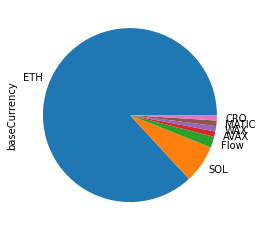

In [36]:
top100cols['baseCurrency'].value_counts().plot.pie()

In [156]:
import plotnine
from plotnine import *

In [201]:
top100cols['valueUSD'].describe()

count    1.000000e+02
mean     2.869996e+07
std      5.402230e+07
min      4.664112e+06
25%      6.465920e+06
50%      1.310916e+07
75%      2.238525e+07
max      4.368491e+08
Name: valueUSD, dtype: float64

In [171]:
top100cols[top100cols['baseCurrency']=='ETH']['valueUSD'].describe()

count    8.600000e+01
mean     3.135902e+07
std      5.769811e+07
min      4.664112e+06
25%      7.036625e+06
50%      1.450816e+07
75%      2.292071e+07
max      4.368491e+08
Name: valueUSD, dtype: float64

(0.0, 250000000.0)

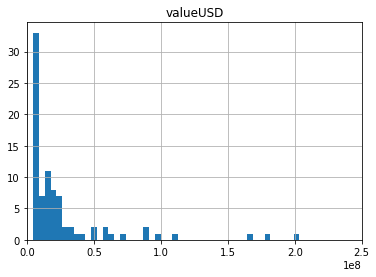

In [289]:
top100cols[top100cols['baseCurrency']=='ETH'].hist(column = 'valueUSD', bins = 100)
plt.xlim([0,250000000])

In [190]:
top100cols[top100cols['baseCurrency']=='ETH']['changeInValueUSD'].describe()

count        56.000000
mean       3195.791945
std       23203.560793
min         -83.127179
25%         -22.086339
50%           1.383682
75%          70.197934
max      173719.086904
Name: changeInValueUSD, dtype: float64

In [182]:
top100cols[top100cols['baseCurrency']=='ETH']['transactions'].describe()

count        86.000000
mean      14299.639535
std       61325.328899
min          62.000000
25%        1099.500000
50%        2610.500000
75%        9704.500000
max      512902.000000
Name: transactions, dtype: float64

In [172]:
top100cols[top100cols['baseCurrency']=='SOL']['valueUSD'].describe()

count    7.000000e+00
mean     1.061480e+07
std      5.763856e+06
min      5.022888e+06
25%      6.633395e+06
50%      1.039207e+07
75%      1.185390e+07
max      2.191403e+07
Name: valueUSD, dtype: float64

In [191]:
top100cols[top100cols['baseCurrency']=='SOL']['changeInValueUSD'].describe()

count      6.000000
mean     120.673803
std      110.673078
min      -11.576927
25%       27.844765
50%      145.774268
75%      175.571440
max      270.032447
Name: changeInValueUSD, dtype: float64

(0.0, 25000000.0)

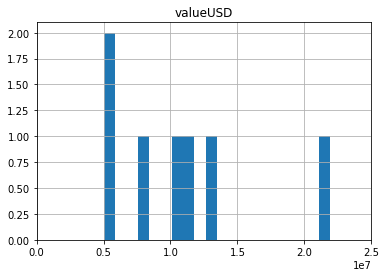

In [295]:
top100cols[top100cols['baseCurrency']=='SOL'].hist(column = 'valueUSD', bins = 20)
plt.xlim([0,25000000])

In [173]:
top100cols[top100cols['baseCurrency']=='Flow']['valueUSD'].describe()

count    2.000000e+00
mean     1.740425e+07
std      1.491731e+07
min      6.856120e+06
25%      1.213019e+07
50%      1.740425e+07
75%      2.267832e+07
max      2.795239e+07
Name: valueUSD, dtype: float64

In [192]:
top100cols[top100cols['baseCurrency']=='Flow']['changeInValueUSD'].describe()

count     2.000000
mean    -32.492149
std      37.730721
min     -59.171797
25%     -45.831973
50%     -32.492149
75%     -19.152325
max      -5.812500
Name: changeInValueUSD, dtype: float64

In [174]:
top100cols[top100cols['baseCurrency']=='WAX']['valueUSD'].describe()

count    1.000000e+00
mean     6.433537e+06
std               NaN
min      6.433537e+06
25%      6.433537e+06
50%      6.433537e+06
75%      6.433537e+06
max      6.433537e+06
Name: valueUSD, dtype: float64

In [193]:
top100cols[top100cols['baseCurrency']=='WAX']['changeInValueUSD'].describe()

count      1.000000
mean     950.418563
std             NaN
min      950.418563
25%      950.418563
50%      950.418563
75%      950.418563
max      950.418563
Name: changeInValueUSD, dtype: float64

In [202]:
top100cols[top100cols['baseCurrency']=='MATIC']['valueUSD'].describe()

count          1.00
mean     5537409.86
std             NaN
min      5537409.86
25%      5537409.86
50%      5537409.86
75%      5537409.86
max      5537409.86
Name: valueUSD, dtype: float64

In [203]:
top100cols[top100cols['baseCurrency']=='MATIC']['changeInValueUSD'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: changeInValueUSD, dtype: float64

In [177]:
top100cols[top100cols['baseCurrency']=='CRO']['valueUSD'].describe()

count          1.00
mean     4711450.06
std             NaN
min      4711450.06
25%      4711450.06
50%      4711450.06
75%      4711450.06
max      4711450.06
Name: valueUSD, dtype: float64

In [194]:
top100cols[top100cols['baseCurrency']=='CRO']['changeInValueUSD'].describe()

count     1.000000
mean     66.039321
std            NaN
min      66.039321
25%      66.039321
50%      66.039321
75%      66.039321
max      66.039321
Name: changeInValueUSD, dtype: float64

In [178]:
top100cols[top100cols['baseCurrency']=='AVAX']['valueUSD'].describe()

count           1.0
mean     42613680.0
std             NaN
min      42613680.0
25%      42613680.0
50%      42613680.0
75%      42613680.0
max      42613680.0
Name: valueUSD, dtype: float64

In [195]:
top100cols[top100cols['baseCurrency']=='AVAX']['changeInValueUSD'].describe()

count    1.00000
mean    -6.73999
std          NaN
min     -6.73999
25%     -6.73999
50%     -6.73999
75%     -6.73999
max     -6.73999
Name: changeInValueUSD, dtype: float64

In [304]:
top100cols = top100cols.astype({"platform": str})

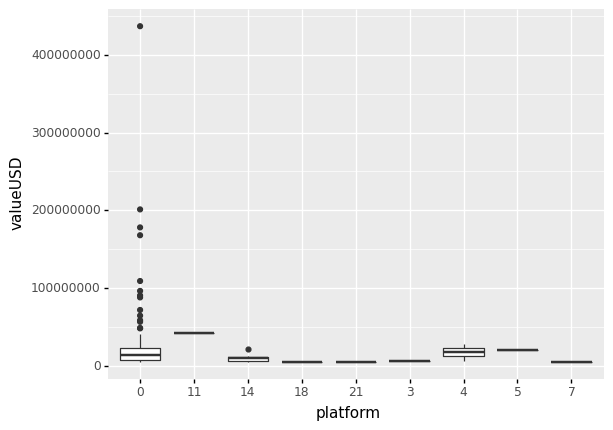

<ggplot: (702662617)>

In [305]:
boxplot = ggplot(top100cols,aes('platform','valueUSD')) + geom_boxplot()
boxplot

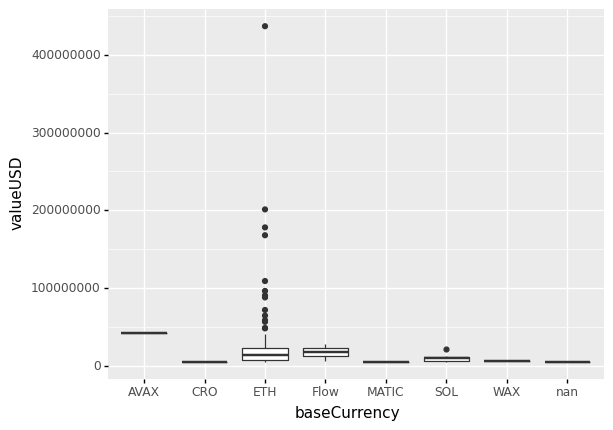

<ggplot: (702603207)>

In [161]:
boxplot = ggplot(top100cols,aes('baseCurrency','valueUSD')) + geom_boxplot()
boxplot

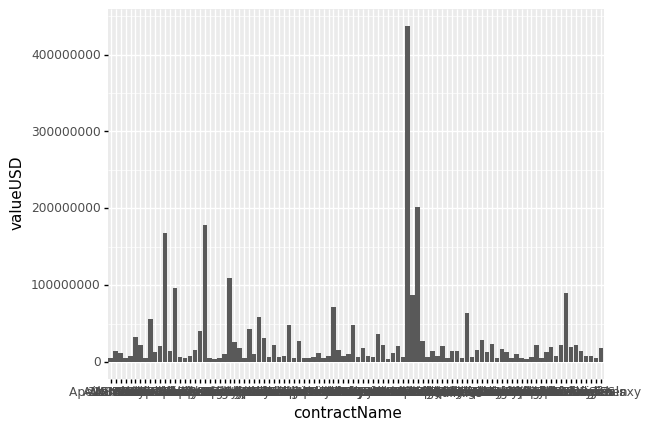

<ggplot: (704596320)>

In [200]:
boxplot = ggplot(top100cols,aes('contractName','valueUSD')) + geom_col()
boxplot

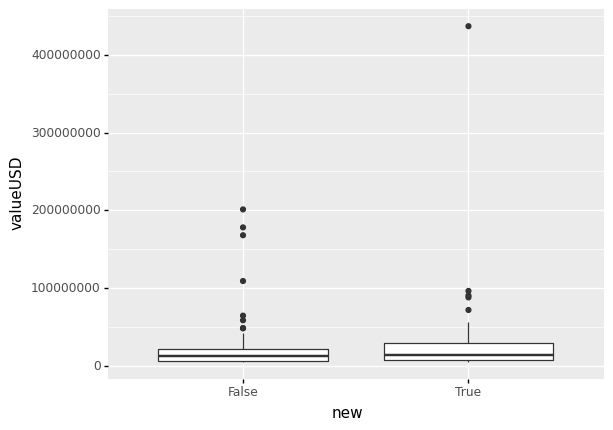

<ggplot: (702801320)>

In [165]:
boxplot = ggplot(top100cols,aes('new','valueUSD')) + geom_boxplot()
boxplot

In [183]:
top100cols[top100cols['new']==True]['valueUSD'].describe()

count    3.200000e+01
mean     3.743368e+07
std      7.762092e+07
min      4.664112e+06
25%      7.362158e+06
50%      1.406307e+07
75%      2.968038e+07
max      4.368491e+08
Name: valueUSD, dtype: float64

In [185]:
top100cols[top100cols['new']==True]['transactions'].describe()

count       32.000000
mean     10085.406250
std       5603.186391
min        509.000000
25%       5441.000000
50%      10861.500000
75%      14124.500000
max      20062.000000
Name: transactions, dtype: float64

In [184]:
top100cols[top100cols['new']==False]['valueUSD'].describe()

count    6.800000e+01
mean     2.458998e+07
std      3.835377e+07
min      4.711450e+06
25%      6.390523e+06
50%      1.280732e+07
75%      2.193803e+07
max      2.012193e+08
Name: valueUSD, dtype: float64

In [186]:
top100cols[top100cols['new']==False]['transactions'].describe()

count    6.800000e+01
mean     3.431335e+04
std      1.438637e+05
min      6.200000e+01
25%      9.810000e+02
50%      1.704000e+03
75%      3.414750e+03
max      1.046603e+06
Name: transactions, dtype: float64

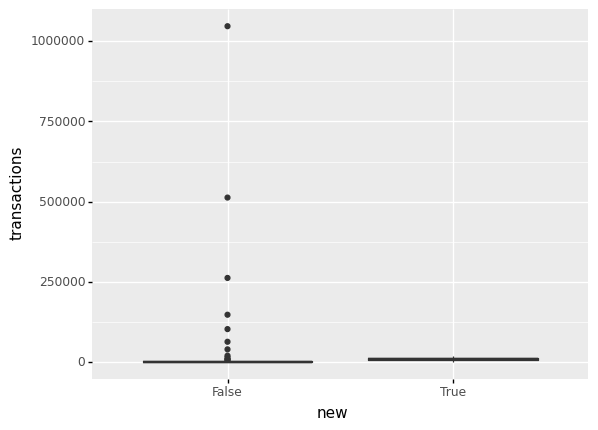

<ggplot: (702909744)>

In [168]:
boxplot = ggplot(top100cols,aes('new','transactions')) + geom_boxplot()
boxplot

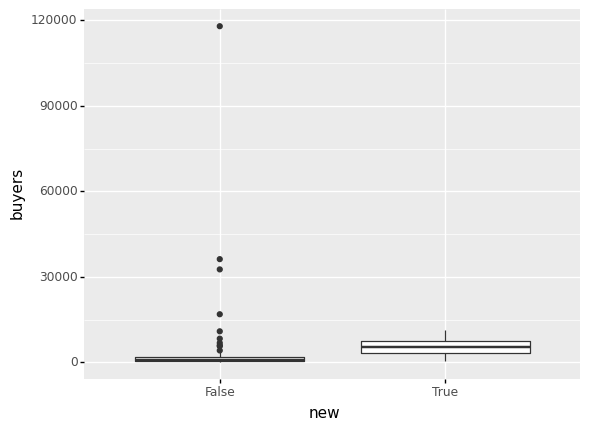

<ggplot: (702937836)>

In [169]:
boxplot = ggplot(top100cols,aes('new','buyers')) + geom_boxplot()
boxplot

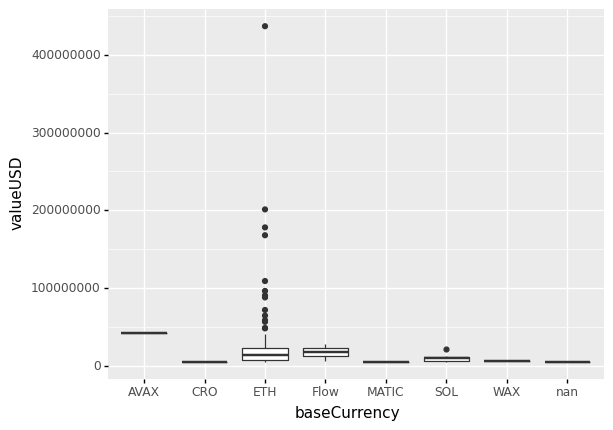

<ggplot: (702705914)>

In [163]:
boxplot = ggplot(top100cols,aes('baseCurrency','valueUSD')) + geom_boxplot()
boxplot

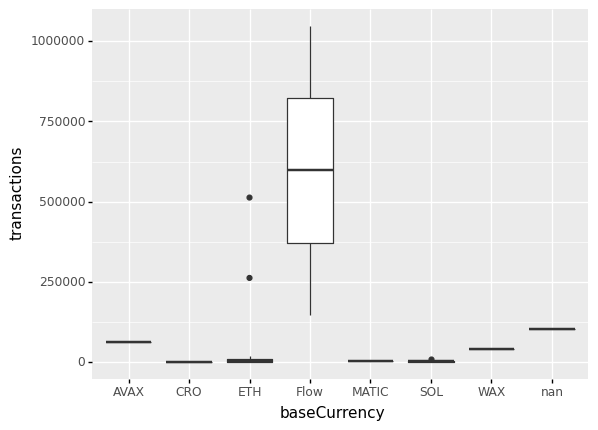

<ggplot: (703039416)>

In [188]:
boxplot = ggplot(top100cols,aes('baseCurrency','transactions')) + geom_boxplot()
boxplot

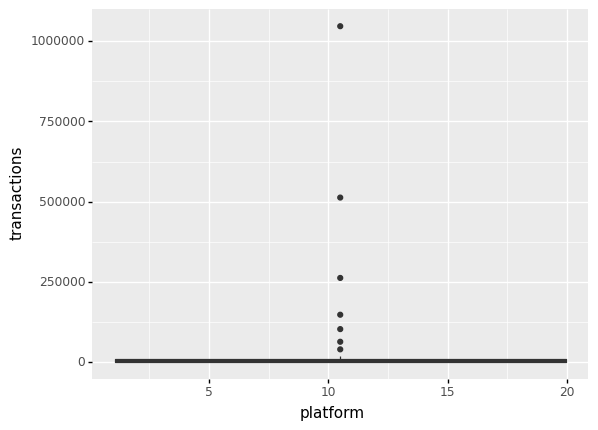

<ggplot: (703030306)>

In [187]:
boxplot = ggplot(top100cols,aes('platform','transactions')) + geom_boxplot()
boxplot

(0.0, 250000000.0)

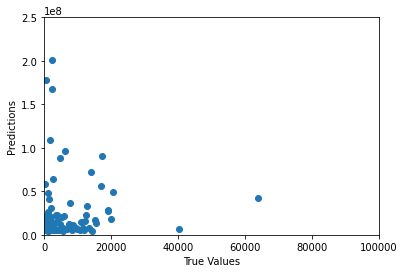

In [519]:
plt.scatter(top100cols['transactions'], top100cols['valueUSD'])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,100000])
plt.ylim([0,250000000])

(0.0, 250000000.0)

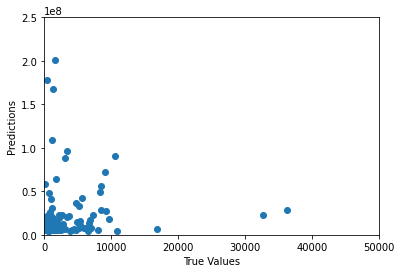

In [526]:
plt.scatter(top100cols['buyers'], top100cols['valueUSD'])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,50000])
plt.ylim([0,250000000])

(0.0, 250000.0)

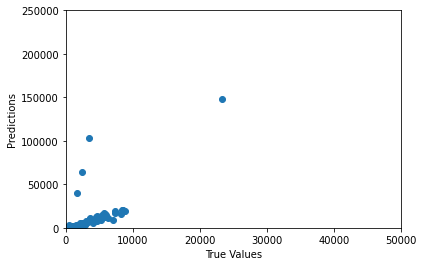

In [530]:
plt.scatter(top100cols['sellers'], top100cols['transactions'])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,50000])
plt.ylim([0,250000])

In [37]:
#number of collections that have been released since the past month
len(top100cols[top100cols['previousValue']==0]['contractName'])

32

In [38]:
top100cols[top100cols['previousValue']==0]['contractName']

0                    Moonbirds
5                        Beanz
6        World Of Women Galaxy
7         MurakamiFlowers Seed
8            Impostors Genesis
11                 Arcade Land
16       MOAR by Joan Cornella
17                       Akuma
19                   Shinsekai
21                   EveraiDuo
25            Akutar Mint Pass
27           VaynerSports Pass
33         VeeFriends Series 2
37                 Los Muertos
39             ShinseiGalverse
45                  fRiENDSiES
49         The Association NFT
55      TombStoned HighSociety
60                   MNLTHRVLD
61                    illogics
63                        Haki
64                       frank
66                 KREEPY CLUB
69       Rtfkt Nike x Monolith
70                   MNLTHSKIN
76               Unemployables
81                ThePicaroons
85    Apeiron Primeval Planets
86                        mems
93                Elysium Code
95                   Space Boo
99                 Ugly People
Name: co

In [39]:
len(top100cols[top100cols['changeInValueUSD']<0])

33

In [40]:
len(top100cols[top100cols['changeInValueUSD']>0])

35

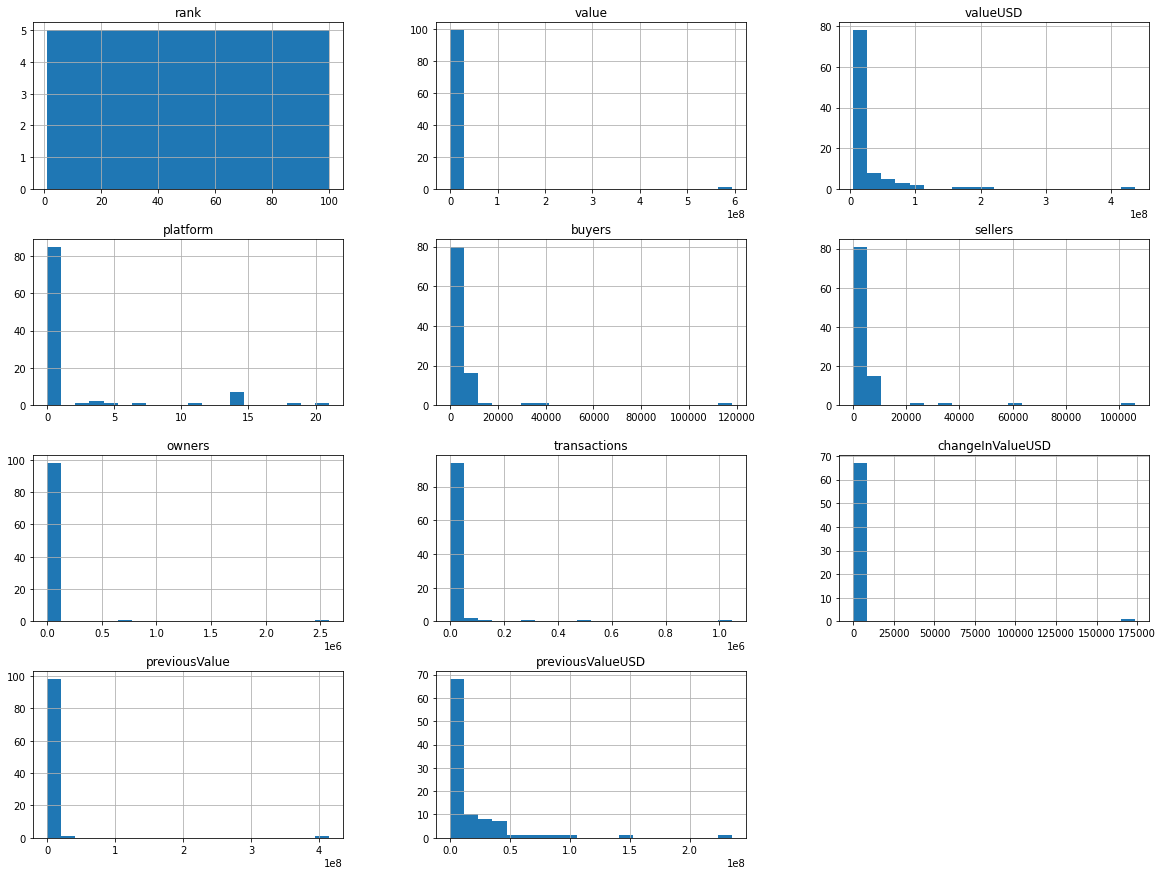

In [41]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
top100cols.hist(bins=20, figsize=(20,15))
plt.show()

In [105]:
dummies1 = pd.get_dummies(top100cols.baseCurrency)
dummies2 = pd.get_dummies(top100cols.platform)

In [106]:
dummies1

,AVAX,CRO,ETH,Flow,MATIC,SOL,WAX
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
95,0,0,1,0,0,0,0
96,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0
98,0,1,0,0,0,0,0


In [107]:
dummies2

,0,3,4,5,7,11,14,18,21
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,1,0
98,0,0,0,0,0,0,0,0,1


In [306]:
merged = pd.concat([top100cols,dummies1, dummies2],axis = 'columns')

In [307]:
merged

,rank,iconUrl,contractName,baseCurrency,isSalesOnly,value,valueUSD,platform,buyers,sellers,...,WAX,0,3,4,5,7,11,14,18,21
0,1,https://cryptoslam-token-images.s3.amazonaws.c...,Moonbirds,ETH,False,1.442236e+05,4.368491e+08,0,11463,5852,...,0,1,0,0,0,0,0,0,0,0
1,2,https://d1nht67oz99wd1.cloudfront.net/resized/...,Mutant Ape Yacht Club,ETH,False,3.787533e+05,2.012193e+08,0,1604,1682,...,0,1,0,0,0,0,0,0,0,0
2,3,https://d1nht67oz99wd1.cloudfront.net/resized/...,Bored Ape Yacht Club,ETH,False,9.762092e+05,1.780618e+08,0,403,469,...,0,1,0,0,0,0,0,0,0,0
3,4,https://d1nht67oz99wd1.cloudfront.net/az.png,Azuki,ETH,False,1.407527e+05,1.679883e+08,0,1256,1559,...,0,1,0,0,0,0,0,0,0,0
4,5,https://d1nht67oz99wd1.cloudfront.net/clonex.jpeg,CloneX,ETH,False,7.833027e+05,1.090996e+08,0,1185,1233,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,https://cryptoslam-token-images.s3.amazonaws.c...,Space Boo,ETH,False,1.614417e+03,4.934264e+06,0,6541,5430,...,0,1,0,0,0,0,0,0,0,0
96,97,https://d1nht67oz99wd1.cloudfront.net/bossbeau...,Boss Beauties,ETH,False,1.510726e+03,4.857013e+06,0,728,767,...,0,1,0,0,0,0,0,0,0,0
97,98,https://cryptoslam-token-images.s3.amazonaws.c...,Candy Digital NFT,NaN,True,4.711974e+06,4.711974e+06,18,10876,3450,...,0,0,0,0,0,0,0,0,1,0
98,99,https://cryptoslam-token-images.s3.amazonaws.c...,MadMeerkatBurrow,CRO,True,1.104151e+07,4.711450e+06,21,527,548,...,0,0,0,0,0,0,0,0,0,1


In [448]:
final = merged.drop(['baseCurrency','platform','rank','iconUrl','contractName','value','previousValue','changeInValueUSD'],axis = 'columns')

In [235]:
##final['changeInValueUSD'] = final['changeInValueUSD'].fillna(0)

In [257]:
final[final.isna().any(axis=1)]

,isSalesOnly,valueUSD,buyers,sellers,owners,transactions,previousValueUSD,new,AVAX,CRO,ETH,Flow,MATIC,SOL,WAX


In [258]:
final.columns

Index(['isSalesOnly', 'valueUSD', 'buyers', 'sellers', 'owners',
       'transactions', 'previousValueUSD', 'new', 'AVAX', 'CRO', 'ETH', 'Flow',
       'MATIC', 'SOL', 'WAX'],
      dtype='object')

In [431]:
final.dropna(axis=0)

,valueUSD,buyers,sellers,owners,transactions,previousValueUSD,AVAX,CRO,ETH,Flow,...,WAX,0,3,4,5,7,11,14,18,21
0,4.368491e+08,11463,5852,0,15350,0.000000e+00,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2.012193e+08,1604,1682,0,2378,1.497476e+08,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1.780618e+08,403,469,0,636,2.354589e+08,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1.679883e+08,1256,1559,0,2186,8.087229e+07,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1.090996e+08,1185,1233,0,1766,6.316196e+07,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.934264e+06,6541,5430,0,14252,0.000000e+00,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
96,4.857013e+06,728,767,0,1133,4.592332e+06,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
97,4.711974e+06,10876,3450,0,103165,1.826081e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,4.711450e+06,527,548,0,992,2.837551e+06,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [451]:
final['isSalesOnly'] = (final['isSalesOnly'] == True).astype(int)

In [452]:
final['new'] = (final['new'] == True).astype(int)

In [453]:
final

,isSalesOnly,valueUSD,buyers,sellers,owners,transactions,previousValueUSD,new,AVAX,CRO,...,WAX,0,3,4,5,7,11,14,18,21
0,0,4.368491e+08,11463,5852,0,15350,0.000000e+00,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2.012193e+08,1604,1682,0,2378,1.497476e+08,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1.780618e+08,403,469,0,636,2.354589e+08,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.679883e+08,1256,1559,0,2186,8.087229e+07,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1.090996e+08,1185,1233,0,1766,6.316196e+07,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,4.934264e+06,6541,5430,0,14252,0.000000e+00,1,0,0,...,0,1,0,0,0,0,0,0,0,0
96,0,4.857013e+06,728,767,0,1133,4.592332e+06,0,0,0,...,0,1,0,0,0,0,0,0,0,0
97,1,4.711974e+06,10876,3450,0,103165,1.826081e+06,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,1,4.711450e+06,527,548,0,992,2.837551e+06,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [333]:
final=final.sample(frac=1)

In [433]:
final

,valueUSD,buyers,sellers,owners,transactions,previousValueUSD,AVAX,CRO,ETH,Flow,...,WAX,0,3,4,5,7,11,14,18,21
0,4.368491e+08,11463,5852,0,15350,0.000000e+00,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2.012193e+08,1604,1682,0,2378,1.497476e+08,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1.780618e+08,403,469,0,636,2.354589e+08,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1.679883e+08,1256,1559,0,2186,8.087229e+07,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1.090996e+08,1185,1233,0,1766,6.316196e+07,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.934264e+06,6541,5430,0,14252,0.000000e+00,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
96,4.857013e+06,728,767,0,1133,4.592332e+06,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
97,4.711974e+06,10876,3450,0,103165,1.826081e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,4.711450e+06,527,548,0,992,2.837551e+06,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [482]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 10)

In [455]:
X = final.drop('valueUSD',axis = 'columns')
X

,isSalesOnly,buyers,sellers,owners,transactions,previousValueUSD,new,AVAX,CRO,ETH,...,WAX,0,3,4,5,7,11,14,18,21
0,0,11463,5852,0,15350,0.000000e+00,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1604,1682,0,2378,1.497476e+08,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,403,469,0,636,2.354589e+08,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1256,1559,0,2186,8.087229e+07,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1185,1233,0,1766,6.316196e+07,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,6541,5430,0,14252,0.000000e+00,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
96,0,728,767,0,1133,4.592332e+06,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
97,1,10876,3450,0,103165,1.826081e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,1,527,548,0,992,2.837551e+06,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [456]:
Y=final.valueUSD
Y

0     4.368491e+08
1     2.012193e+08
2     1.780618e+08
3     1.679883e+08
4     1.090996e+08
          ...     
95    4.934264e+06
96    4.857013e+06
97    4.711974e+06
98    4.711450e+06
99    4.664112e+06
Name: valueUSD, Length: 100, dtype: float64

In [483]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [499]:
model1.fit(X_train,Y_train)
score = model1.score(X_test, Y_test)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


-8692.086810832416

In [493]:
model1.fit(X,Y)
score = model1.score(X_test, Y_test)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.7351410403382042

In [464]:
model1.fit(X,Y)
score = model1.score(X, Y)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.4684898260963035

In [496]:
model2.fit(X_train,Y_train)
score = model2.score(X_test, Y_test)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


-0.9788840715537219

In [486]:
model2.fit(X,Y)
score = model2.score(X, Y)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.9429997758014377

In [487]:
model2.fit(X,Y)
score = model2.score(X_test, Y_test)
score

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.8193827295965892

/Users/kkama/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


(0.0, 250000000.0)

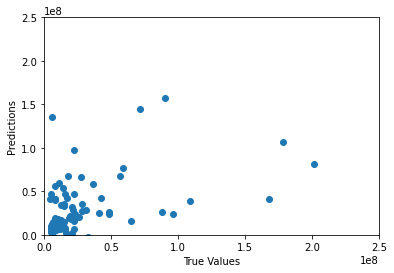

In [500]:
predictions = model1.predict(X)
plt.scatter(Y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,250000000])
plt.ylim([0,250000000])

Text(0, 0.5, 'valueUSD')

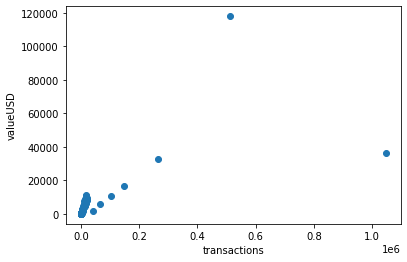

In [298]:
plt.scatter(top100cols.transactions, top100cols.buyers)
plt.xlabel('transactions')
plt.ylabel('valueUSD')

Text(0, 0.5, 'valueUSD')

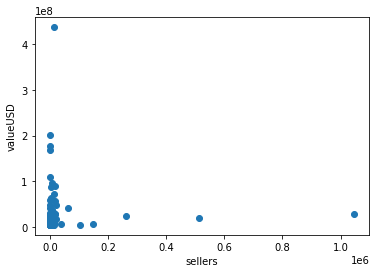

In [303]:
plt.scatter(top100cols.transactions, top100cols.valueUSD)
plt.xlabel('sellers')
plt.ylabel('valueUSD')

Text(0, 0.5, 'valueUSD')

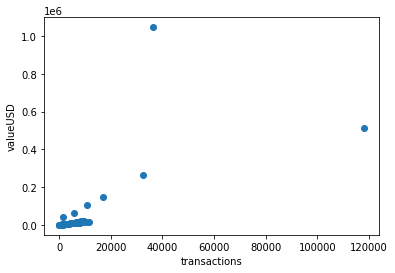

In [301]:
plt.scatter(top100cols.buyers, top100cols.transactions)
plt.xlabel('transactions')
plt.ylabel('valueUSD')

(0.0, 250000000.0)

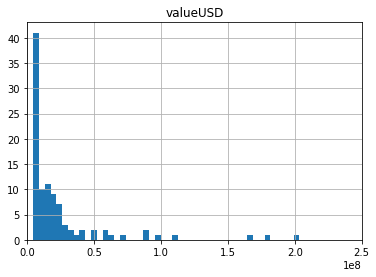

In [287]:
top100cols.hist(column = 'valueUSD', bins = 100)
plt.xlim([0,250000000])

In [89]:
X.columns

Index([     'isSalesOnly',           'buyers',          'sellers',
                 'owners',     'transactions', 'changeInValueUSD',
       'previousValueUSD',              'new',             'AVAX',
                    'CRO',              'ETH',             'Flow',
                  'MATIC',              'SOL',              'WAX',
                        0,                  3,                  4,
                        5,                  7,                 11,
                       14,                 18,                 21],
      dtype='object')

In [93]:
X = final.drop(['isSalesOnly','valueUSD','new','AVAX',
                    'CRO',              'ETH',             'Flow',
                  'MATIC',              'SOL',              'WAX',
                        0,                  3,                  4,
                        5,                  7,                 11,
                       14,                 18,                 21], axis = 'columns')
X

,buyers,sellers,owners,transactions,changeInValueUSD,previousValueUSD
9,1705,1744,1,2595,154.748485,2.534883e+07
58,857,848,0,1126,-5.419665,1.095203e+07
21,9177,7355,0,18970,0.000000,0.000000e+00
7,3161,2674,1,4627,0.000000,0.000000e+00
85,2018,402,0,3568,0.000000,0.000000e+00
...,...,...,...,...,...,...
92,1014,1171,0,2039,313.522523,1.235704e+06
41,93,79,0,114,-3.270978,1.575226e+07
60,605,452,0,854,0.000000,0.000000e+00
57,1771,1911,3904,2682,160.923545,3.982804e+06
